# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    city_url =f"{url}q={city}&appid={weather_api_key}"

    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | berlevag
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | casas grandes
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | mmathubudukwane
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | goderich
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | mananara
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | natchez
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | lumby
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | bambous vi

Processing Record 38 of Set 4 | erenhot
Processing Record 39 of Set 4 | sarankhola
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | tallahassee
Processing Record 43 of Set 4 | andilamena
Processing Record 44 of Set 4 | dayong
Processing Record 45 of Set 4 | kudahuvadhoo
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | najran
Processing Record 48 of Set 4 | junagadh
Processing Record 49 of Set 4 | lahat
Processing Record 0 of Set 5 | aksarka
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | pemangkat
Processing Record 5 of Set 5 | maunabo
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | diofior
Processing Record 8 of Set 5 | kant
Processing Record 9 of Set 5 | gondar
Processing Record 10 of Set 5 | toliary
City not found. Skipping...
Pr

Processing Record 28 of Set 8 | vardo
Processing Record 29 of Set 8 | kaitangata
Processing Record 30 of Set 8 | pavullo nel frignano
Processing Record 31 of Set 8 | olafsvik
Processing Record 32 of Set 8 | seymchan
Processing Record 33 of Set 8 | champerico
Processing Record 34 of Set 8 | san patricio
Processing Record 35 of Set 8 | grand gaube
Processing Record 36 of Set 8 | miyako
Processing Record 37 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 38 of Set 8 | roald
Processing Record 39 of Set 8 | mana
Processing Record 40 of Set 8 | colares
Processing Record 41 of Set 8 | semirom
Processing Record 42 of Set 8 | atar
Processing Record 43 of Set 8 | nome
Processing Record 44 of Set 8 | bulgan
Processing Record 45 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 46 of Set 8 | san nicola
Processing Record 47 of Set 8 | antalaha
Processing Record 48 of Set 8 | palmer
Processing Record 49 of Set 8 | qaqortoq
Processing Record 0 of Set 9 | revelstok

Processing Record 17 of Set 12 | chandbali
Processing Record 18 of Set 12 | clarksburg
Processing Record 19 of Set 12 | fandriana
Processing Record 20 of Set 12 | camacha
Processing Record 21 of Set 12 | guiglo
Processing Record 22 of Set 12 | cap malheureux
Processing Record 23 of Set 12 | cimislia
Processing Record 24 of Set 12 | marawi
Processing Record 25 of Set 12 | awbari
Processing Record 26 of Set 12 | tieli
Processing Record 27 of Set 12 | amga
Processing Record 28 of Set 12 | regensdorf
Processing Record 29 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 12 | bhadra
Processing Record 31 of Set 12 | hurghada
Processing Record 32 of Set 12 | garbolovo
Processing Record 33 of Set 12 | sainte-suzanne
Processing Record 34 of Set 12 | ola
Processing Record 35 of Set 12 | straumen
Processing Record 36 of Set 12 | serenje
Processing Record 37 of Set 12 | mogadishu
Processing Record 38 of Set 12 | yumen
Processing Record 39 of Set 12 | nanyuki
Processing Re

In [53]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)



# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [54]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,287.81,67,26,4.24,ZA,1681447677
1,berlevag,70.8578,29.0864,275.15,59,37,7.20,NO,1681447678
2,rikitea,-23.1203,-134.9692,297.56,81,100,10.37,PF,1681447678
3,casas grandes,30.3667,-107.9500,287.00,28,0,7.73,MX,1681447518
4,mmathubudukwane,-24.6000,26.4333,290.90,48,0,0.94,BW,1681447679


In [55]:
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 32) * (5/9)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,142.116667,67,26,4.24,ZA,1681447677
1,berlevag,70.8578,29.0864,135.083333,59,37,7.20,NO,1681447678
2,rikitea,-23.1203,-134.9692,147.533333,81,100,10.37,PF,1681447678
3,casas grandes,30.3667,-107.9500,141.666667,28,0,7.73,MX,1681447518
4,mmathubudukwane,-24.6000,26.4333,143.833333,48,0,0.94,BW,1681447679


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data1/cities1.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data1/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,142.116667,67,26,4.24,ZA,1681447677
1,berlevag,70.8578,29.0864,135.083333,59,37,7.20,NO,1681447678
2,rikitea,-23.1203,-134.9692,147.533333,81,100,10.37,PF,1681447678
3,casas grandes,30.3667,-107.9500,141.666667,28,0,7.73,MX,1681447518
4,mmathubudukwane,-24.6000,26.4333,143.833333,48,0,0.94,BW,1681447679


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

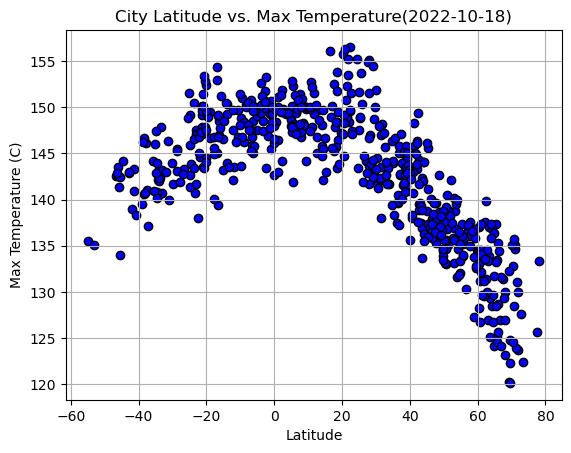

In [58]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df["Lat"].astype("float")
y_values=city_data_df["Max Temp"].astype("float")

plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black",)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature(2022-10-18)")
plt.grid()
#plt.ylim(-20,40)

# Save the figure
plt.savefig("output_data1/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

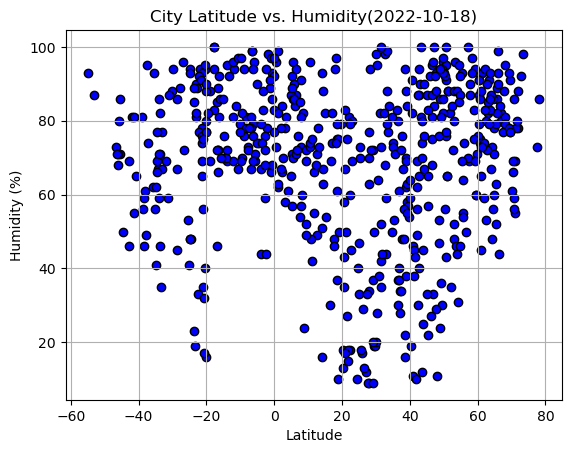

In [59]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df["Lat"].astype("float")
y_values=city_data_df["Humidity"].astype("float")

plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black",)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data1/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

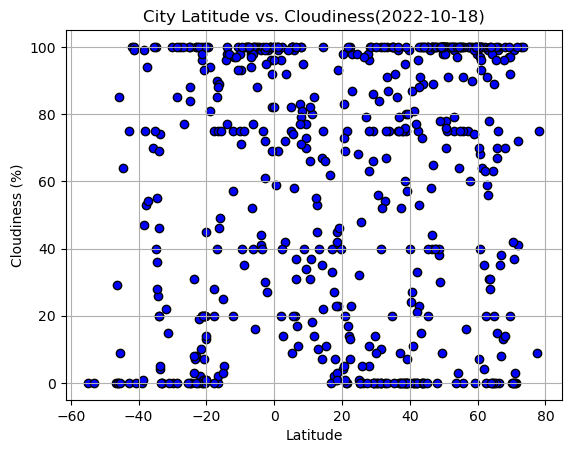

In [60]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df["Lat"].astype("float")
y_values=city_data_df["Cloudiness"].astype("float")

plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black",)


# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("output_data1/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

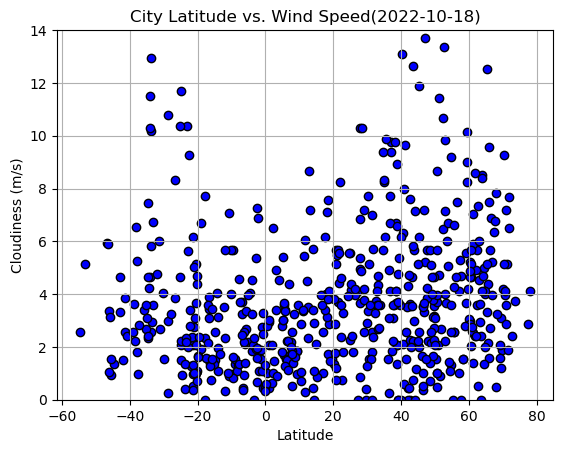

In [61]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df["Lat"].astype("float")
y_values=city_data_df["Wind Speed"].astype("float")

plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black",)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (m/s)")
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.ylim(0,14)
plt.grid()

# Save the figure
plt.savefig("output_data1/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
 slope,intercept, r_value, p_value, std_err= linregress(x_values, y_values)
 regress_values = x_values * slope + intercept
 line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,berlevag,70.8578,29.0864,135.083333,59,37,7.20,NO,1681447678
3,casas grandes,30.3667,-107.9500,141.666667,28,0,7.73,MX,1681447518
5,ponta do sol,32.6667,-17.1000,143.611111,68,54,3.74,PT,1681447679
6,khatanga,71.9667,102.5000,123.700000,78,41,6.51,RU,1681447679
7,goderich,43.7501,-81.7165,144.072222,45,89,5.66,CA,1681447680


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,142.116667,67,26,4.24,ZA,1681447677
2,rikitea,-23.1203,-134.9692,147.533333,81,100,10.37,PF,1681447678
4,mmathubudukwane,-24.6000,26.4333,143.833333,48,0,0.94,BW,1681447679
8,mount gambier,-37.8333,140.7667,146.072222,49,53,5.27,AU,1681447680
9,airai,-8.9266,125.4092,146.244444,76,35,1.35,TL,1681447680


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7454003160716974


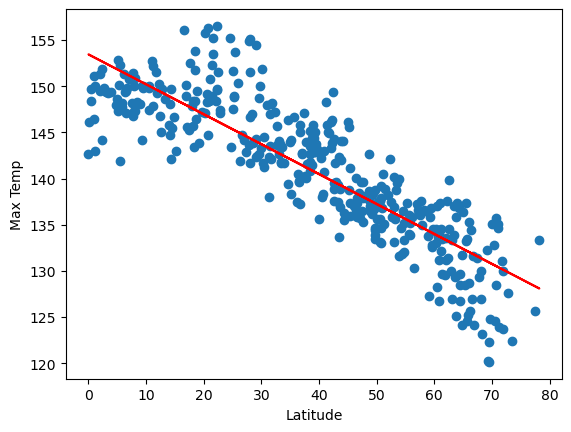

In [65]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"].astype("float")
y_values=northern_hemi_df["Max Temp"].astype("float")
x_label="Latitude"
y_label="Max Temp"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.43449330504834505


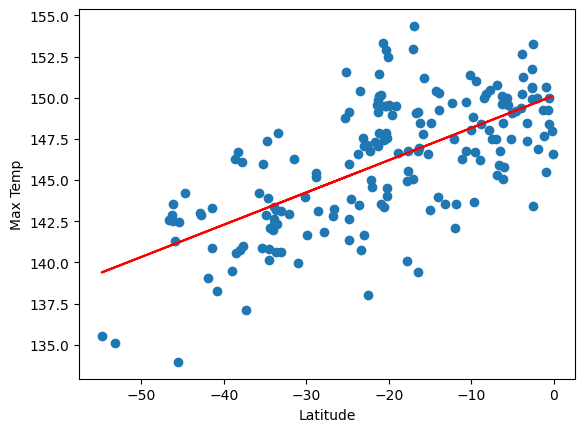

In [66]:
# Linear regression on Southern Hemisphere

x_values=southern_hemi_df["Lat"].astype("float")
y_values=southern_hemi_df["Max Temp"].astype("float")
x_label="Latitude"
y_label="Max Temp"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,66),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: R value indicates strong linear relationship. It shows negative correlation as the slope is negative.Southern hemisphere: Slope is positive. Correlation is positive. It shows that with every increase in latitude there is increase in temperature. The value of max temp and latitude impacts each other based on r-value.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.03517168224197202


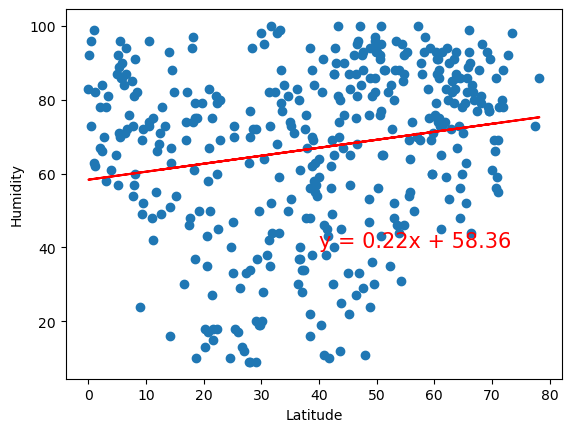

In [67]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"].astype("float")
y_values=northern_hemi_df["Humidity"].astype("float")
x_label="Latitude"
y_label="Humidity"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.04888675843868036


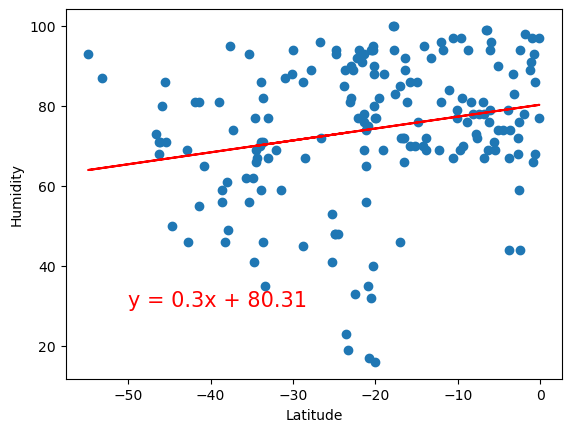

In [68]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"].astype("float")
y_values=southern_hemi_df["Humidity"].astype("float")
x_label="Latitude"
y_label="Humidity"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere: R value indicates moderate linear relationship. It shows positive correlation as the slope is positive.Southern hemisphere: Slope is positive. r value indicates Correlation is weakly positive. It shows that with every increase in latitude there is increase in humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.009492667679597248


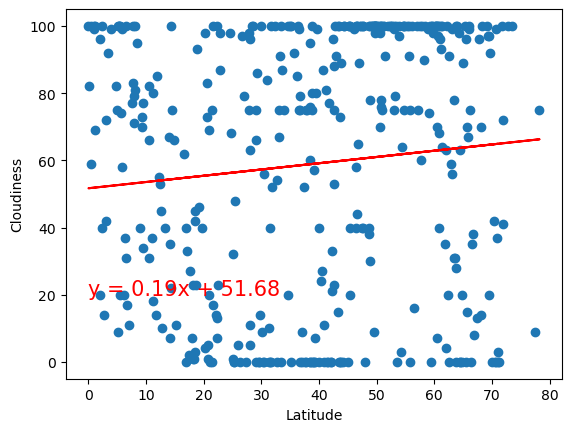

In [69]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"].astype("float")
y_values=northern_hemi_df["Cloudiness"].astype("float")
x_label="Latitude"
y_label="Cloudiness"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.15904955744101312


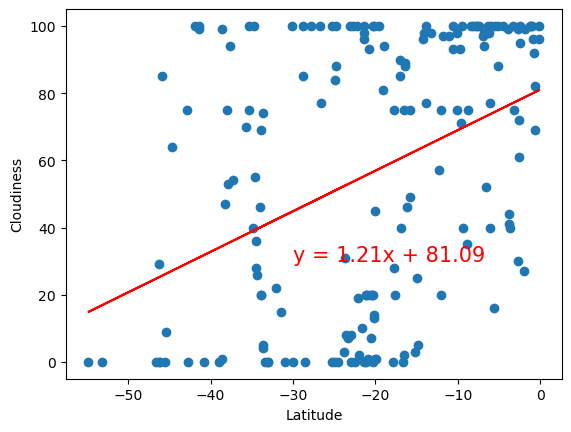

In [70]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"].astype("float")
y_values=southern_hemi_df["Cloudiness"].astype("float")
x_label="Latitude"
y_label="Cloudiness"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**  Northern Hemisphere: R value indicates extremely weak linear relationship. Southern hemisphere: Slope is positive. r value indicates Correlation is weakly positive.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.04264137102269033


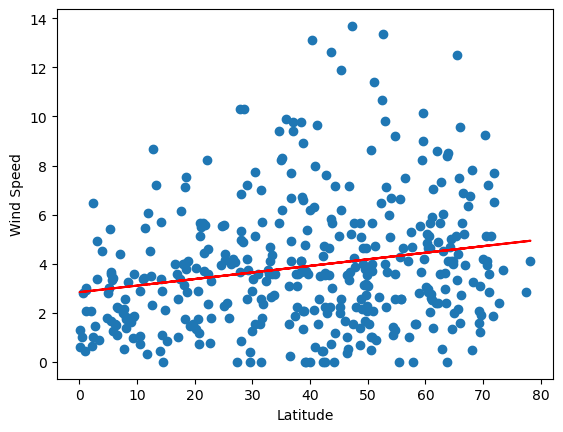

In [71]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"].astype("float")
y_values=northern_hemi_df["Wind Speed"].astype("float")
x_label="Latitude"
y_label="Wind Speed"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)

# Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,15),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.0616030120637899


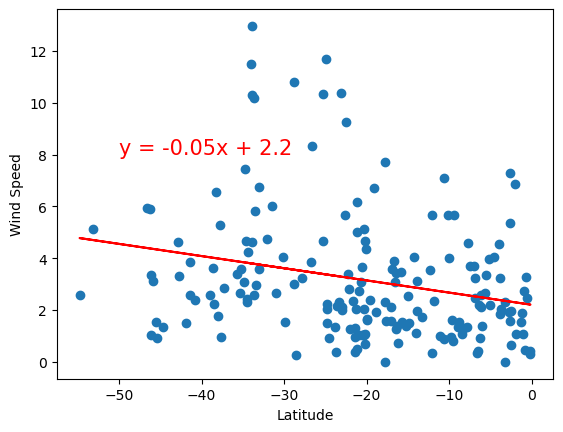

In [72]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"].astype("float")
y_values=southern_hemi_df["Wind Speed"].astype("float")
x_label="Latitude"
y_label="Wind Speed"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel(x_label)
plt.ylabel(y_label)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**  Northern Hemisphere: R value indicates extremely weak linear and positive relationship. Southern hemisphere: Slope is positive. r value indicates Correlation is weakly negative.The negative slope  indicates that as the latitude increases, the wind speed tends to decrease slightly. 